In [36]:
import pandas as pd
import string
import collections
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.cm as cm
import matplotlib.pyplot as plt


df = pd.read_csv('Untitled form.csv')

In [37]:
df.head()

Timestamp Please enter your Full Name  \
0  2022/12/17 11:17:15 pm GMT-5             Preet Chaudhari   
1  2022/12/17 11:30:26 pm GMT-5                     Preet C   
2  2022/12/17 11:34:46 pm GMT-5               Atharv Mhatre   
3  2022/12/18 12:51:34 am GMT-5                Shawn Thomas   
4   2022/12/18 1:49:25 am GMT-5               Ashish karade   

  Enter the keywords you searched for? Which database did you use?  \
0                     Machine Learning                      PubMed   
1                                  IOT                      Scopus   
2             Image Driven 2D Material                      PubMed   
3                    Machine learning                       Scopus   
4                    Machine learning                       Scopus   

                            What paper did you read?  \
0                                                NaN   
1     Survey on Prediction Algorithms in Smart Homes   
2  Evolution of π-Peptide Self-Assembly: From Und...   
3                                                NaN   
4  Fornet , a software package for training Behle...   

                 What did you find from this paper?  \
0  Implementation about the Stock price predictions   
1                                               NaN   
2                                               NaN   
3                                               NaN   
4                Research paper on software package   

  Were the results relevant to your expectation?  \
0                                            Yes   
1                                       Somewhat   
2                                            Yes   
3                                       Somewhat   
4                                             No   

  Please feel free to leave any comments or suggestions to make your experience better  
0                                No such suggestions                                    
1                                                NaN                                    
2                                                NaN                                    
3                         Results were upto the mark                                    
4                                               None

In [4]:
df.shape

(6, 8)

In [18]:
df[["Please enter your Full Name", "Which database did you use?","Enter the keywords you searched for?"]].head()

Please enter your Full Name Which database did you use?  \
0             Preet Chaudhari                      PubMed   
1                     Preet C                      Scopus   
2               Atharv Mhatre                      PubMed   
3                Shawn Thomas                      Scopus   
4               Ashish karade                      Scopus   

  Enter the keywords you searched for?  
0                     Machine Learning  
1                                  IOT  
2             Image Driven 2D Material  
3                    Machine learning   
4                    Machine learning

In [5]:
df['Which database did you use?'].value_counts()

Scopus            3
PubMed            2
Web of Science    1
Name: Which database did you use?, dtype: int64

In [6]:
df['Which database did you use?'].value_counts(normalize=True)

Scopus            0.500000
PubMed            0.333333
Web of Science    0.166667
Name: Which database did you use?, dtype: float64

In [7]:
df['Were the results relevant to your expectation?'].value_counts(normalize=True)


Yes         0.333333
Somewhat    0.333333
No          0.333333
Name: Were the results relevant to your expectation?, dtype: float64

In [8]:
%matplotlib inline

<AxesSubplot:>

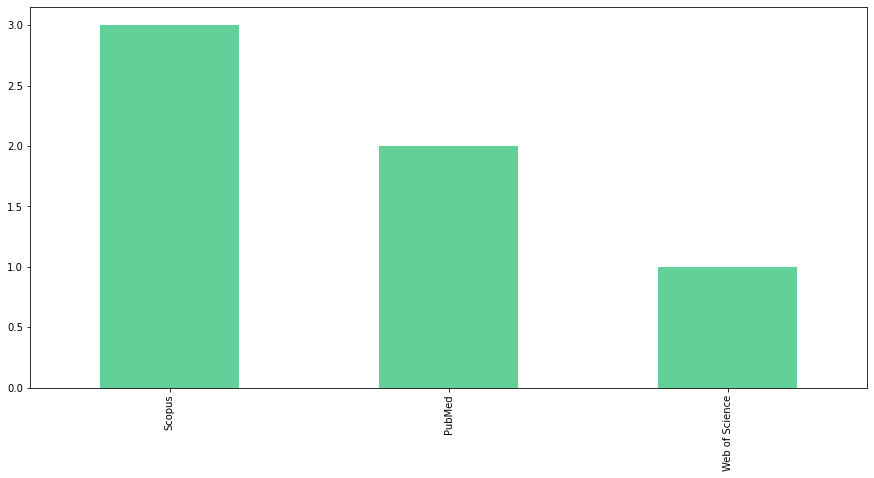

In [9]:
df['Which database did you use?'].value_counts().plot(kind="bar", figsize=(15,7), color="#61d199")

In [10]:
said_yes = df[df['Were the results relevant to your expectation?'] == 'Yes']
said_yes.head(3)

Timestamp Please enter your Full Name  \
0  2022/12/17 11:17:15 pm GMT-5             Preet Chaudhari   
2  2022/12/17 11:34:46 pm GMT-5               Atharv Mhatre   

  Enter the keywords you searched for? Which database did you use?  \
0                     Machine Learning                      PubMed   
2             Image Driven 2D Material                      PubMed   

                            What paper did you read?  \
0                                                NaN   
2  Evolution of π-Peptide Self-Assembly: From Und...   

                 What did you find from this paper?  \
0  Implementation about the Stock price predictions   
2                                               NaN   

  Were the results relevant to your expectation?  \
0                                            Yes   
2                                            Yes   

  Please feel free to leave any comments or suggestions to make your experience better  
0                                No such suggestions                                    
2                                                NaN

In [11]:
said_no = df[df['Were the results relevant to your expectation?'] == 'No']
said_no.head(3)

Timestamp Please enter your Full Name  \
4  2022/12/18 1:49:25 am GMT-5               Ashish karade   
5  2022/12/18 1:59:16 am GMT-5             Sutariya Ashish   

  Enter the keywords you searched for? Which database did you use?  \
4                    Machine learning                       Scopus   
5                      Cloud Computing              Web of Science   

                            What paper did you read?  \
4  Fornet , a software package for training Behle...   
5  Block Design-Based Key Agreement for Group Dat...   

   What did you find from this paper?  \
4  Research paper on software package   
5                                 NaN   

  Were the results relevant to your expectation?  \
4                                             No   
5                                             No   

  Please feel free to leave any comments or suggestions to make your experience better  
4                                               None                                    
5                                                NaN